# Data Science and Artifical Intelligence - Credit Card Fraud 
Team members:
1) Chai Yinn
2) Larry Lee
3) Glendon Thaiw



# Problem Statement: Evaluating Sampling Techniques on Various Machine Learning Models for Addressing an Imbalanced Dataset

It is difficult for machine learning models to learn from highly imbalanced datasets as they are biased towards the majority class due to optimising overall accuracy. Changing class distributions through popular sampling techniques are common methods to balance the data. Thus, our goal is to review the various sampling methods to improve classification performances.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import sklearn.metrics
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

import os

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False



# Exploratory Data Analysis & Visualization to Understand the Data

In [48]:
CreditcardData = pd.read_csv('creditcard.csv')
CreditcardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Firstly, we want to scale the amount as it helps to normalise the data within a range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. 

In [49]:
from sklearn.preprocessing import StandardScaler
CreditcardData['normalizedAmount'] = StandardScaler().fit_transform(CreditcardData['Amount'].values.reshape(-1,1))
CreditcardData['normalizedTime'] = StandardScaler().fit_transform(CreditcardData['Time'].values.reshape(-1,1))
CreditcardData = CreditcardData.drop(['Time'],axis=1)
CreditcardData = CreditcardData.drop(['Amount'],axis=1)

In [50]:
CreditcardData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount,normalizedTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [51]:
CreditcardData.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount,normalizedTime
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16,-1.050379e-14
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


The .describe() function would usually provide us with information about the distribution of our dataset such as mean, median, max and other key parameters.

However, as the dataset provided are the result of a PCA transformation due to confidentiality issues, we do not have information about the actual data and variables. 

Hence, the .describe() function in this instance, does not give us much information about the dataset.


0    284315
1       492
Name: Class, dtype: int64

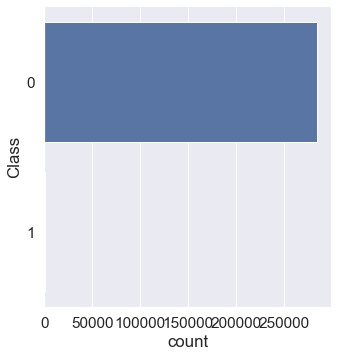

In [52]:
sb.catplot(y = 'Class', data = CreditcardData, kind = "count")
CreditcardData['Class'].value_counts()

A countplot of our categorical data shows us that only **492 (0.173%) out of 284,807 (99.83%)** of the total transactions are fraudulent, which indicates the *highly imbalanced* dataset with respect to the target variable class. 

This is an important insight to be considered when we generate different predictive models going ahead.


Next, we would attempt to conduct a visual analysis on our data to identify patterns and trends using visualisation tools - Boxplot, Density plot and Violin plot. 

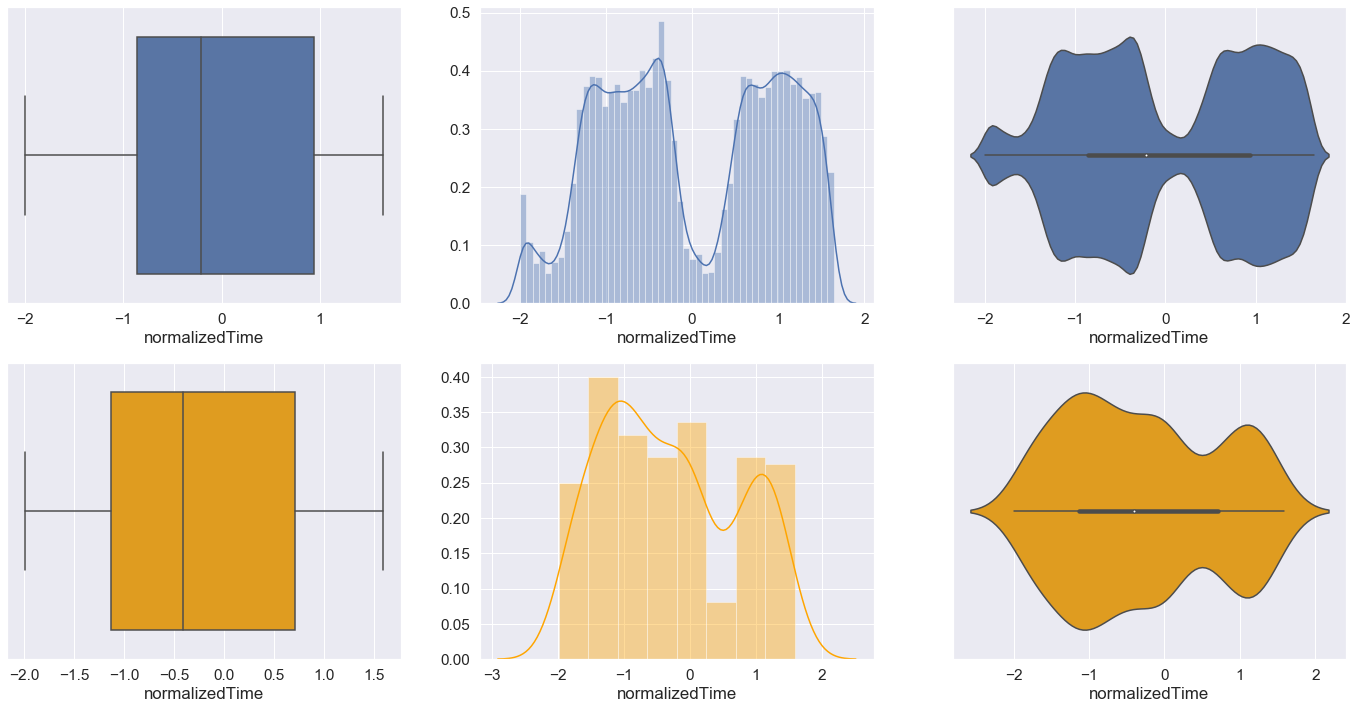

In [53]:
import seaborn as sb

class_0 = CreditcardData.loc[CreditcardData['Class'] == 0]["normalizedTime"]
class_1 = CreditcardData.loc[CreditcardData['Class'] == 1]["normalizedTime"]
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(class_0, orient = "h", ax = axes[0,0])
sb.distplot(class_0, ax = axes[0,1])
sb.violinplot(class_0, ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(class_1, orient = "h", ax = axes[1,0], color = 'orange')
sb.distplot(class_1, ax = axes[1,1], color = 'orange')
sb.violinplot(class_1, ax = axes[1,2], color = 'orange')


Text(0.5, 1.0, 'Distribution of Transaction Amount')

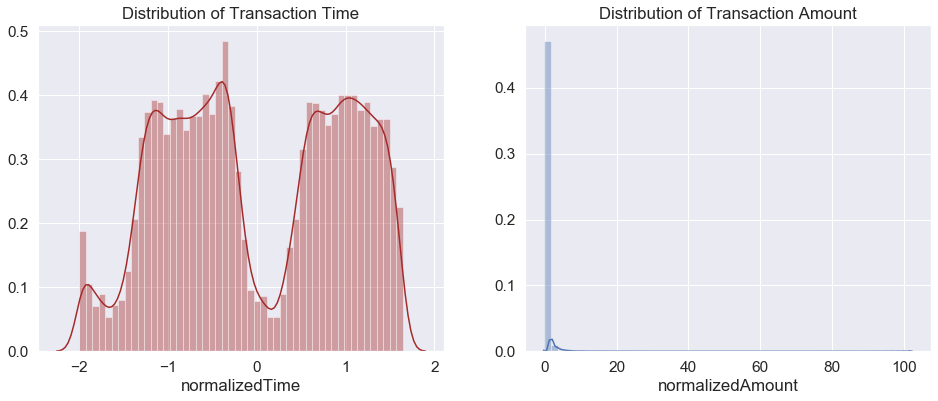

In [54]:
fig, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)
ax1 = sb.distplot(CreditcardData['normalizedTime'], color='brown', ax=ax[0])
ax2 = sb.distplot(CreditcardData['normalizedAmount'], ax=ax[1])

ax1.set_title('Distribution of Transaction Time')
ax2.set_title('Distribution of Transaction Amount')

From the above plots, the skewness of the Time, Amount and Class columns are clearly illustrated. 


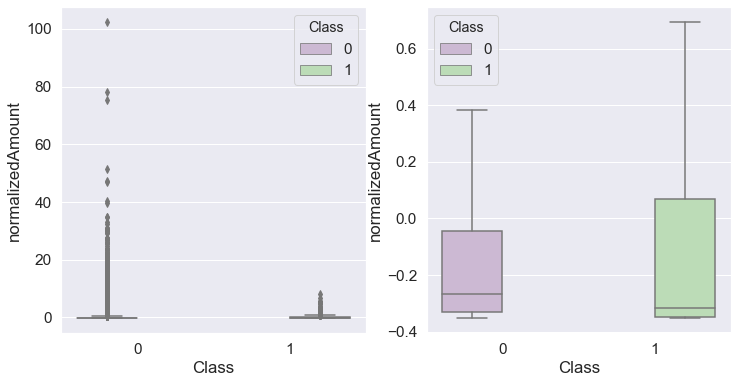

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sb.boxplot(ax = ax1, x="Class", y="normalizedAmount", hue="Class",data=CreditcardData, palette="PRGn",showfliers=True)
s = sb.boxplot(ax = ax2, x="Class", y="normalizedAmount", hue="Class",data=CreditcardData, palette="PRGn",showfliers=False)
plt.show();

From the above plot, we can see that the normal transaction contain more outliers as compared to the Fraudulent transactions. 

In [56]:
temp = CreditcardData[['normalizedAmount','Class']].copy()
normal = temp.loc[temp['Class'] == 0]['normalizedAmount']
fraud = temp.loc[temp['Class'] == 1]['normalizedAmount']

Even though most of the variables in the dataset are encoded due to confidentiality issues, we observe that the transaction amount data under the "Amount" column, has *not* been encoded. Hence, we see that there is an opportunity to observe the relationship between the transaction amount and the class of the transaction (fraudulent or normal).

We start off by separating our fraudulent and normal transaction dataset.

In [1]:
normal.describe()

NameError: name 'normal' is not defined

In [58]:
fraud.describe()

count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: normalizedAmount, dtype: float64

Using the .describe method, we can see that the **fraudulent transactions has a higher mean than the normal transactions**.


In [59]:
fraudtime = CreditcardData.loc[CreditcardData['Class'] == 1]["normalizedTime"]
fraud =  CreditcardData.loc[CreditcardData['Class'] == 1]
fraud.shape

(492, 31)

Next, we would like to determine if there is any observable relationship between the amount of each fraudulent transaction over time.  

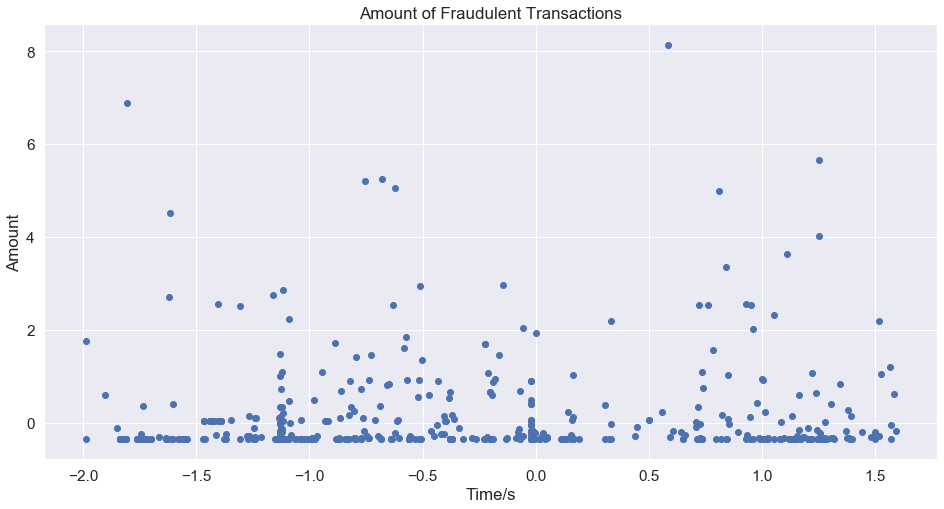

In [60]:
fraud1 = CreditcardData.loc[CreditcardData['Class'] == 1]
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(fraud1['normalizedTime'],fraud1['normalizedAmount'])

plt.title("Amount of Fraudulent Transactions")
plt.xlabel('Time/s')
plt.ylabel('Amount')
plt.show()

With a time series plot of Amount against Time, we can observe the relationship between the amount of each fraudulent transaction over time. 

However, with the above plot, we can observe that there isn't any noticable trends or pattern in this relationship. 

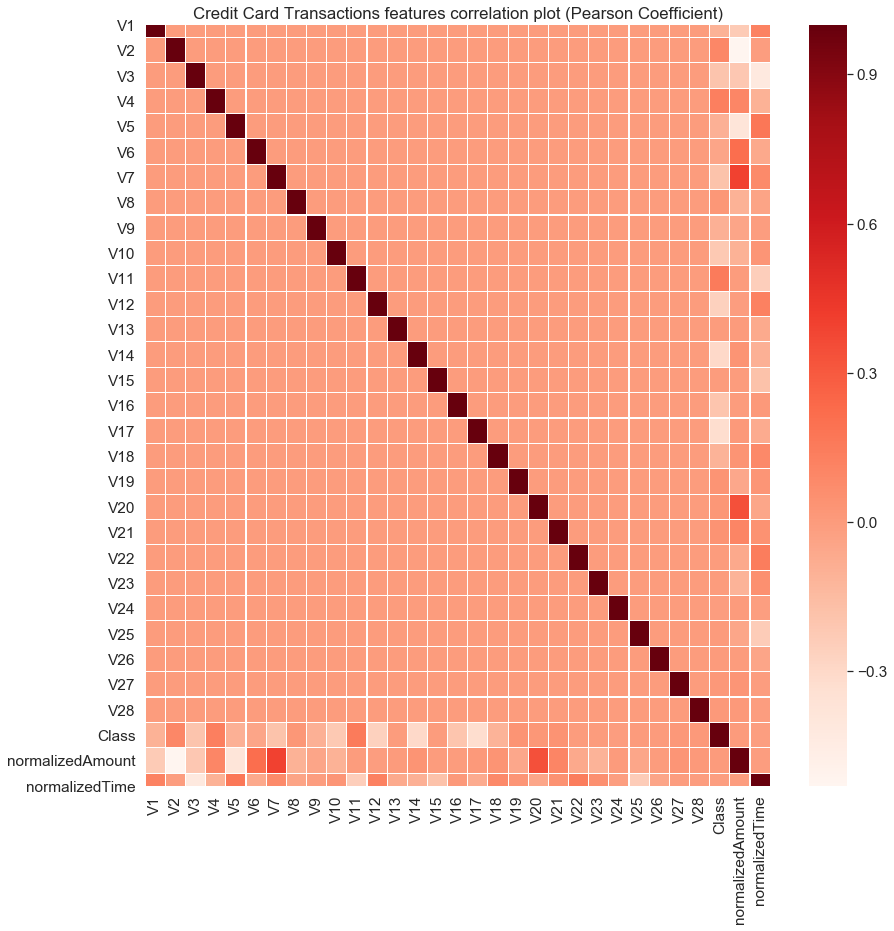

In [61]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson Coefficient)')
corr = CreditcardData.corr()
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

We would attempt to observe the correlation between all the variables in the dataset. 

This can be done through a Pearson's correlation coefficient Correlation Heat map. 

From the above correlation heatmap, we can observe that there is no notable correlation between features V1-V28. This is to be expected. Our team knew that the components have undergone PCA and now form an orthogonal basis set. Hence, the correlation between the variables is 0.

However, we can observe that there are certain correlations between some of these features and Time. (Inverse correlation between V3 and Time). 

There are also certain correlations between some of these features and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

# Preparing the Dataset to Suit our Specific Problem Definition

We will first split our dataset into two parts - the target variable in focus "Class", and all the other variables as our predictors.

In [62]:
target = 'Class'
predictors = ['normalizedTime', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'normalizedAmount']

train_df, test_df = train_test_split(CreditcardData, stratify=CreditcardData['Class'], test_size=TEST_SIZE)
print(train_df.shape)
print(test_df.shape)
# train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)
# print(train_df.shape)
# print(valid_df.shape)

(227845, 31)
(56962, 31)


# Implementing the Various Sampling Techniques

The sampling techniques we chose to evaluate are Random Undersampling (RUS) and Synthetic Minority Oversampling Technique (SMOTE).

We will change the dataset class distributions as follows:

# Random Undersampling (RUS)

In RUS, instances of the majority class (non-fraud) are randomly discarded from the dataset. We chose to evaluate this method 
as it is one of the popular preprocessing technique used in preparing imbalanced datasets.

We also created a validation set that will not be undersampled. This is because in the real world, our dataset will not be balanced, hence the validation set will give us the most accurate depiction of our results.


In [68]:
from imblearn.under_sampling import RandomUnderSampler


X = CreditcardData.ix[:, CreditcardData.columns != 'Class']
y = CreditcardData.ix[:, CreditcardData.columns == 'Class']

X_train_rus, X_valid_rus, y_train_rus, y_valid_rus = train_test_split(X,y,stratify=CreditcardData['Class'],test_size = 0.05)

# print(y_train_sampled.shape)

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_rus, y_train_rus)

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus,y_rus,stratify=y_rus,test_size = TEST_SIZE)

X_train_rus_df = pd.DataFrame(X_train_rus)
y_train_rus_df = pd.DataFrame(y_train_rus)
X_test_rus_df = pd.DataFrame(X_test_rus)
y_test_rus_df = pd.DataFrame(y_test_rus)
X_valid_rus_df = pd.DataFrame(X_valid_rus)
y_valid_rus_df = pd.DataFrame(y_valid_rus)





# Synthetic Minority Oversampling Technique (SMOTE)

SMOTE generates artificial minority class instances from the existing points by combining features of the target instance and
its nearest neighbours. This method does not duplicate existing instances from the data like oversampling.

Similarly, we are aware that the synthetic data that Smote creates will be extremely close to our existing data. Hence, instead of just having a train and test set, we also extracted a validation set before using SMOTE to ensure fairness in our evaluation.


In [66]:
from imblearn.over_sampling import SMOTE #Over sampling
import sklearn

# train_df, test_df = train_test_split(CreditcardData, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)

X = CreditcardData.ix[:, CreditcardData.columns != 'Class']
y = CreditcardData.ix[:, CreditcardData.columns == 'Class']

X_train_sampled, X_valid_sampled, y_train_sampled, y_valid_sampled = train_test_split(X,y,stratify=CreditcardData['Class'],test_size = VALID_SIZE)

# print(X_train_sampled.shape)
# print(X_valid_sampled.shape)

# X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_train_sampled,y_train_sampled,test_size = TEST_SIZE
#                                                                                     ,random_state = 0)
# print(X_train_sampled.shape)
# print(X_test_sampled.shape)


sm = SMOTE(ratio='auto',kind='regular')
X_sampled,y_sampled = sm.fit_sample(X_train_sampled,y_train_sampled.values.ravel())

#Percentage of fraudlent records in original data
Source_data_no_fraud_count = len(CreditcardData[CreditcardData.Class==0])
Source_data_fraud_count = len(CreditcardData[CreditcardData.Class==1])
print("Records in original data")
print(Source_data_no_fraud_count, Source_data_fraud_count)
print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

print('')
#Percentage of fraudlent records in sampled data

Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
print("Records in original data")
print(Sampled_data_no_fraud_count, Sampled_data_fraud_count)
print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))




Records in original data
284315 492
Percentage of fraud counts in original dataset:0.1727485630620034%

Records in original data
227451 227451
Percentage of fraud counts in the new data:50.0%


In [69]:
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled,y_sampled,stratify=y_sampled,test_size = TEST_SIZE)
print("Number transactions train dataset: ", len(X_train_sampled))
print("Number transactions test dataset: ", len(X_test_sampled))
print("Total number of transactions: ", len(X_train_sampled)+len(X_test_sampled))

Number transactions train dataset:  363921
Number transactions test dataset:  90981
Total number of transactions:  454902


In [70]:
X_train_sampled_df = pd.DataFrame(X_train_sampled)
y_train_sampled_df = pd.DataFrame(y_train_sampled)
X_test_sampled_df = pd.DataFrame(X_test_sampled)
y_test_sampled_df = pd.DataFrame(y_test_sampled)
X_valid_sampled_df = pd.DataFrame(X_valid_sampled)
y_valid_sampled_df = pd.DataFrame(y_valid_sampled)

print(X_train_sampled.shape)
print(y_train_sampled.shape)
print(X_valid_sampled_df.shape)

(363921, 30)
(363921,)
(56962, 30)


# Classification

The following classification tasks were each run under 3 different conditions - No sampling (Control), SMOTE, RUS.

The datasets were used as inputs for 4 different models - Decision Tree Classifier, Random Forest Classifier, Logistic Regression & Artificial Neural Networks.


# Performance Metrics

We will evaluate the performance of the classifiers using the following criterias (Sorted in order of Importance):

1) Fbeta_score: The F-beta score, also known as F2-score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors recall (beta -> 0 considers only precision, beta -> inf only recall). We set beta to 5 indicating a 5 times emphasis on Recall. The reason why we favour Recall over Precision is because when we are looking at Recall, we are looking at how many Fraudulent transactions are wrongly classified. This is extremely important because we want to catch as many Fraudulent transactions as possible. (Not detecting a fradulent transaction is extremely costly to the bank) Precision on the otherhand focuses on how many non-frauds are classified as frauds. Although this is not ideal as well, banks should be less worried about falsely accusing their customers as it is less costly than missing out on a fraudulent transaction. However, customer welfare cannot be ignored hence precision has its importance. Therefore, we placed the highest importance on the Fbeta_score metric.

F2-Score = Fβ=(1+β2)⋅precision⋅recall/[(β2⋅precision)+recall]

2) Recall = TP/(TP+FN); Recall refers to the percentage of total relevant results correctly identified by the classifier.

3) Matthews Correlation Coefficient(MCC): MCC is a correlation coefficient between observed and predicted binary classifications.
MCC = (TPxTN-FPxFN)/sqrt((TP+FP)(TP+FN)(TN+FP)(TN+FN));
It returns a value between -1 and +1. +1 represents a perfect perfect prediction.

4) Confusion Matrix: Shows the results of correctly and incorrectly classified examples. 

5) Area Under the Curve (ROC-AUC): Corresponds to the probability that a classifier will give a higher rank to a randomly chosen positive example than a negative example. An ROC-AUC score of 1 is optimal.

*We understand that Classification Accuracy is not an accurate measure when data is highly imbalanced, however we included it for observational purposes *

6) Accuracy 


## Decision Tree Classifier

Decision Tree Classification classifies the data by utilising a Divide-and-Conquer approach. It splits the data on the feature that results in the larget information gain, until all the samples at each node belong to the same class.


# Decision Tree Classifier Control

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9989817773252344
The recall score is:  0.7040816326530612
The F2 Score is:  0.7040816326530612
The ROC_AUC Score is:  0.8517858219539926
The matthew's correlation coefficient is:  0.7035716439079852



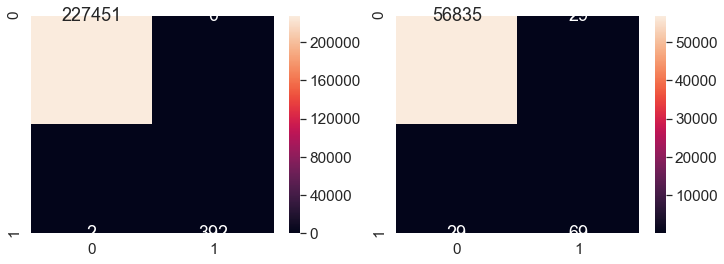

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(train_df[predictors], train_df[target].values)      # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(train_df[predictors])
y_test_pred = dectree.predict(test_df[predictors])


# Check the Goodness of Fit (on Train Data)
# print("Goodness of Fit of Model \tTrain Dataset")
# print("Classification Accuracy \t:", dectree.score(train_df[predictors], train_df[target].values))
# print("The ROC_AUC Score is: ", roc_auc_score(train_df[target].values, y_train_pred))
# print("The F1 Score is: ", f1_score(train_df[target].values, y_train_pred))
# scoring_function(confusion_matrix(train_df[target].values, y_train_pred))
# print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(test_df[predictors], test_df[target].values))
print("The recall score is: ", sklearn.metrics.recall_score(test_df[target].values, y_test_pred))
print("The F2 Score is: ", fbeta_score(test_df[target].values, y_test_pred, 5))
print("The ROC_AUC Score is: ", roc_auc_score(test_df[target].values, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_df[target].values, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_df[target].values, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix( test_df[target].values, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



# # Plot the Decision Tree

# import graphviz
# treedot = export_graphviz(dectree,                                      # the model
#                           feature_names = train_df[predictors].columns,              # the features 
#                           out_file = None,                              # output file
#                           filled = True,                                # node colors
#                           rounded = True,                               # make pretty
#                           special_characters = True)                    # postscript

# graphviz.Source(treedot)

# Decision Tree Classifier with SMOTE

In [72]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train_sampled_df,y_train_sampled_df)      # train the decision tree model

y_test_pred = dectree.predict(X_test_sampled_df)
y_valid_pred = dectree.predict(X_valid_sampled_df)


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9974500170365241
The recall score is:  0.999164651571774
The F2 Score is:  0.9990328820116054
The ROC_AUC Score is:  0.9974500358823896
The matthew's correlation coefficient is:  0.9949058843341413

Goodness of Fit of Model 	Valid Dataset
Classification Accuracy 	: 0.9953126645834065
The recall score is:  0.7653061224489796
The F2 Score is:  0.704225352112676
The ROC_AUC Score is:  0.8805075913314117
The matthew's correlation coefficient is:  0.42262637541756853



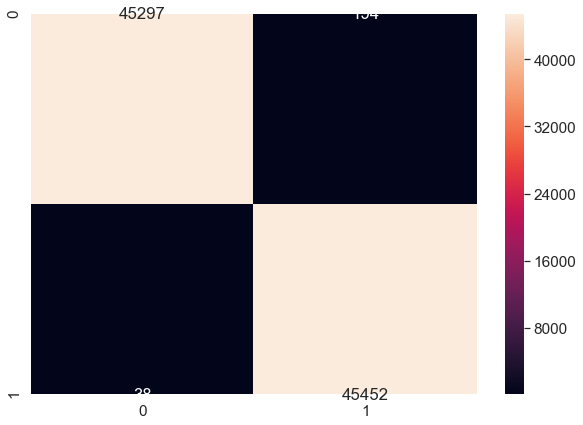

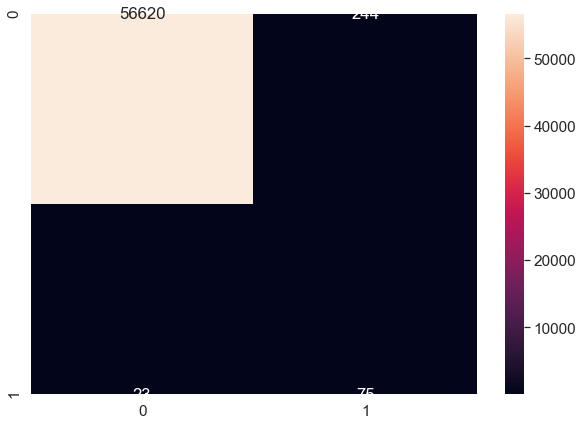

In [73]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test_sampled_df, y_test_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test_sampled_df, y_test_pred))
print("The F2 Score is: ", fbeta_score(y_test_sampled_df, y_test_pred, 5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test_sampled_df, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test_sampled_df, y_test_pred))
# scoring_function(confusion_matrix(y_test_sampled_df, y_test_pred))
print()

# Check the Goodness of Fit (on Valid Data)
print("Goodness of Fit of Model \tValid Dataset")
print("Classification Accuracy \t:", accuracy_score(y_valid_sampled_df, y_valid_pred))

print("The recall score is: ", sklearn.metrics.recall_score(y_valid_sampled_df, y_valid_pred))
print("The F2 Score is: ", fbeta_score(y_valid_sampled_df, y_valid_pred, 5))
print("The ROC_AUC Score is: ", roc_auc_score(y_valid_sampled_df, y_valid_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_valid_sampled_df, y_valid_pred))

# scoring_function(confusion_matrix(y_train_sampled_df, y_train_pred))
print()





#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_test_sampled_df, y_test_pred), annot=True, fmt='d')
plt.show()

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_valid_sampled_df, y_valid_pred), annot=True, fmt='d')
plt.show()



# Decision Tree Classifier with RUS

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9197860962566845
The recall score is:  0.9139784946236559
The F2 Score is:  0.9143566404633843
The ROC_AUC Score is:  0.9197552047586364
The matthew's correlation coefficient is:  0.8396064578454308

Goodness of Fit of Model 	Valid Dataset
Classification Accuracy 	: 0.8958640544905554
The recall score is:  1.0
The F2 Score is:  0.30473511486169713
The ROC_AUC Score is:  0.9478404614518853
The matthew's correlation coefficient is:  0.12185574121138718



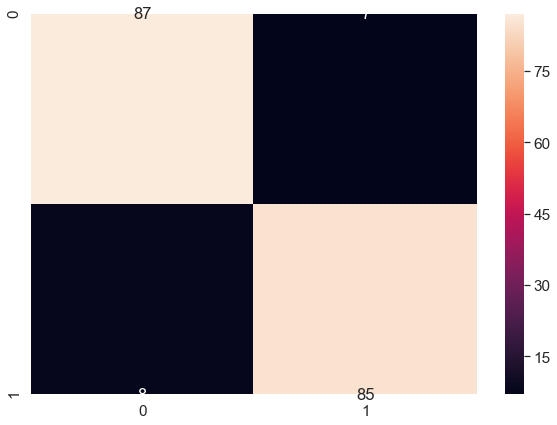

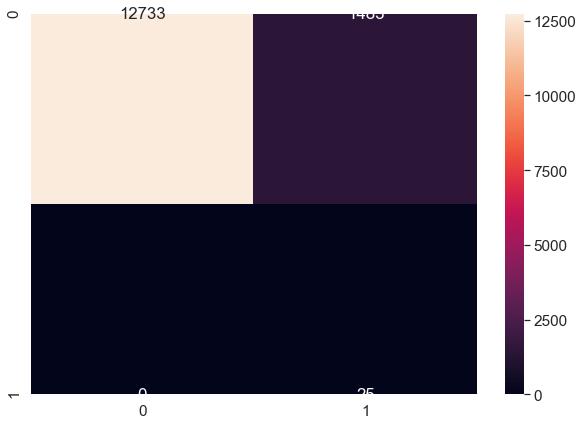

In [74]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train_rus_df,y_train_rus_df)      # train the decision tree model

y_test_pred = dectree.predict(X_test_rus_df)
y_valid_pred = dectree.predict(X_valid_rus_df)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test_rus_df, y_test_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test_rus_df, y_test_pred))
print("The F2 Score is: ", fbeta_score(y_test_rus_df, y_test_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test_rus_df, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test_rus_df, y_test_pred))

# scoring_function(confusion_matrix(y_test_sampled_df, y_test_pred))
print()

# Check the Goodness of Fit (on Valid Data)
print("Goodness of Fit of Model \tValid Dataset")
print("Classification Accuracy \t:", accuracy_score(y_valid_rus_df, y_valid_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_valid_rus_df, y_valid_pred))
print("The F2 Score is: ", fbeta_score(y_valid_rus_df, y_valid_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_valid_rus_df, y_valid_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_valid_rus_df, y_valid_pred))

# scoring_function(confusion_matrix(y_train_sampled_df, y_train_pred))
print()





#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_test_rus_df, y_test_pred), annot=True, fmt='d')
plt.show()

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_valid_rus_df, y_valid_pred), annot=True, fmt='d')
plt.show()

## Random Forest Classifier 

Random Forest Classifier fits many Decision Trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

# Random Forest Classifier Control

In [75]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [76]:
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(test_df[predictors])


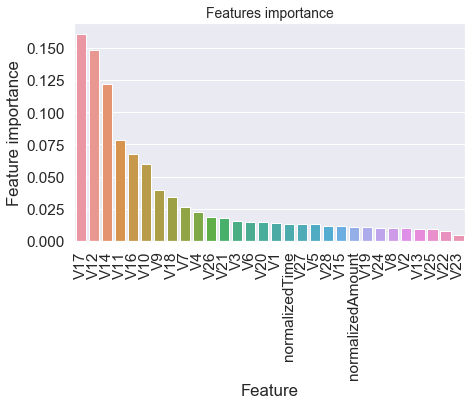

In [77]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sb.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

From the above graph, we can see that the more important features are **V17, V12, V14, V10, V11, V16.**



In [78]:
# print(test_df[target].values)
# print(preds)

The standard accuracy score is:  0.999420666409185
The recall score is:  0.7142857142857143
The F2 Score is:  0.7207920792079208
The ROC_AUC Score is:  0.857098892595868
The matthew's correlation coefficient is:  0.8162310142465571


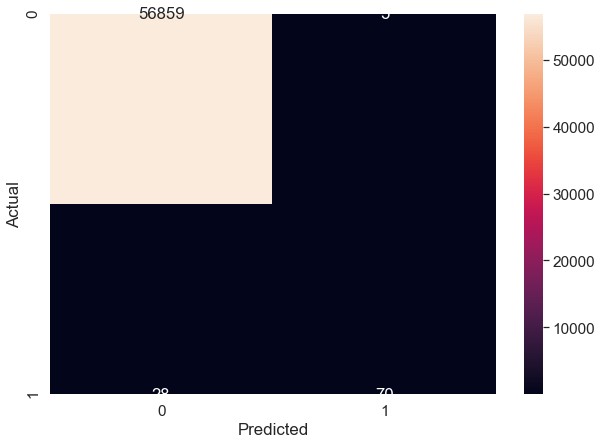

In [79]:
print("The standard accuracy score is: ", accuracy_score(test_df[target].values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_df[target].values, preds))
print("The F2 Score is: ", fbeta_score(test_df[target].values, preds,5))
print("The ROC_AUC Score is: ", roc_auc_score(test_df[target].values, preds))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_df[target].values, preds))

cm = pd.crosstab(test_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

# Random Forest Classifier with SMOTE

In [80]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [81]:
clf.fit(X_train_sampled_df, y_train_sampled_df)

y_test_pred = clf.predict(X_test_sampled_df)
y_valid_pred = clf.predict(X_valid_sampled_df)


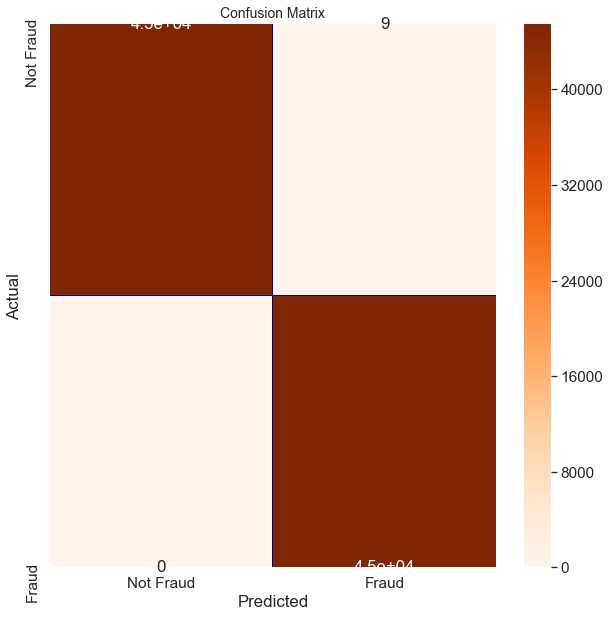

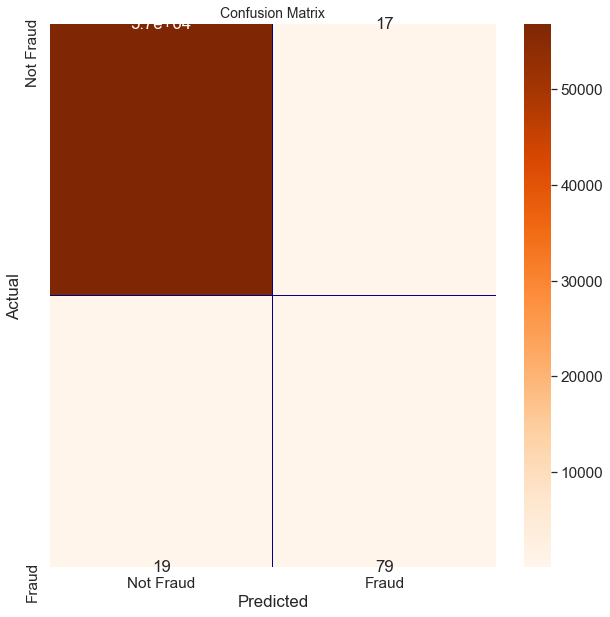

Goodness of Fit of Model 	Test Dataset
The standard accuracy score is:  0.9999010782471065
The recall score is:  1.0
The F2 Score is:  0.9999923906086583
The ROC_AUC Score is:  0.9999010793343739
The matthew's correlation coefficient is:  0.9998021760617742
 
Goodness of Fit of Model 	Valid Dataset
The standard accuracy score is:  0.9993679997191109
The recall score is:  0.8061224489795918
The F2 Score is:  0.8067556952081697
The ROC_AUC Score is:  0.9029117450300324
The matthew's correlation coefficient is:  0.8141598980420826


In [82]:
# print(preds)
# print(y_test_sampled_df[0].values)

y_test_sampled_df_array = y_test_sampled_df[0].values


cm = pd.crosstab(y_test_sampled_df_array, y_test_pred, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,10))
sb.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Oranges")
plt.title('Confusion Matrix', fontsize=14)
plt.show()



y_valid_sampled_df_array = y_valid_sampled_df['Class'].values

cm = pd.crosstab(y_valid_sampled_df_array, y_valid_pred, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,10))
sb.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Oranges")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

print("Goodness of Fit of Model \tTest Dataset")
print("The standard accuracy score is: ", accuracy_score(y_test_sampled_df, y_test_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test_sampled_df, y_test_pred))
print("The F2 Score is: ", fbeta_score(y_test_sampled_df, y_test_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test_sampled_df, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test_sampled_df, y_test_pred))

print(' ')
print("Goodness of Fit of Model \tValid Dataset")
print("The standard accuracy score is: ", accuracy_score(y_valid_sampled_df, y_valid_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_valid_sampled_df, y_valid_pred))
print("The F2 Score is: ", fbeta_score(y_valid_sampled_df, y_valid_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_valid_sampled_df, y_valid_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_valid_sampled_df, y_valid_pred))



# Random Forest Classifier with RUS

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9197860962566845
The recall score is:  0.9139784946236559
The F2 Score is:  0.9143566404633843
The ROC_AUC Score is:  0.9197552047586364
The matthew's correlation coefficient is:  0.8396064578454308

Goodness of Fit of Model 	Valid Dataset
Classification Accuracy 	: 0.8958640544905554
The recall score is:  1.0
The F2 Score is:  0.30473511486169713
The ROC_AUC Score is:  0.9478404614518853
The matthew's correlation coefficient is:  0.12185574121138718



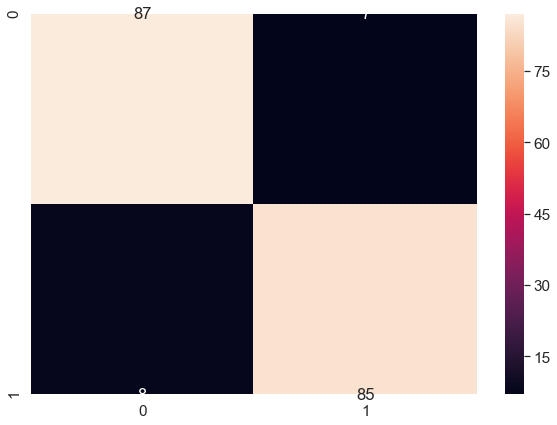

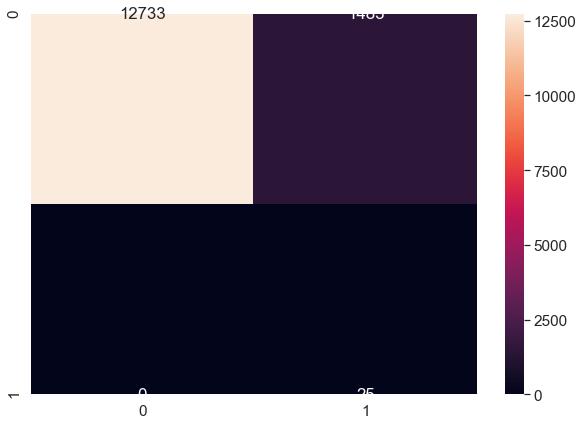

In [83]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

clf.fit(X_train_rus_df, y_train_rus_df)


y_test_pred = dectree.predict(X_test_rus_df)
y_valid_pred = dectree.predict(X_valid_rus_df)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test_rus_df, y_test_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test_rus_df, y_test_pred))
print("The F2 Score is: ", fbeta_score(y_test_rus_df, y_test_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test_rus_df, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test_rus_df, y_test_pred))

# scoring_function(confusion_matrix(y_test_sampled_df, y_test_pred))
print()

# Check the Goodness of Fit (on Valid Data)
print("Goodness of Fit of Model \tValid Dataset")
print("Classification Accuracy \t:", accuracy_score(y_valid_rus_df, y_valid_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_valid_rus_df, y_valid_pred))
print("The F2 Score is: ", fbeta_score(y_valid_rus_df, y_valid_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_valid_rus_df, y_valid_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_valid_rus_df, y_valid_pred))

# scoring_function(confusion_matrix(y_train_sampled_df, y_train_pred))
print()





#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_test_rus_df, y_test_pred), annot=True, fmt='d')
plt.show()

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_valid_rus_df, y_valid_pred), annot=True, fmt='d')
plt.show()

# Logistic Regression

Logistic regression is one of the most popular classifiers. The logistic regression model describes relationship between predictors and estimates the probability of belonging to each category for a given set of predictors.

Given the nature that the Logistic Regression is a standard statistical technique, we knew that it is insensitive to the original density of the data. However, we decided to keep carry out Smote and RUS anyways in the name of experiementation.

# Logistic Regression Control

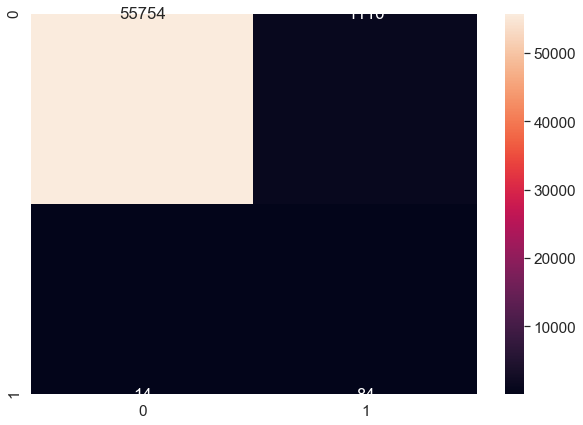

Roc Curve evaluation


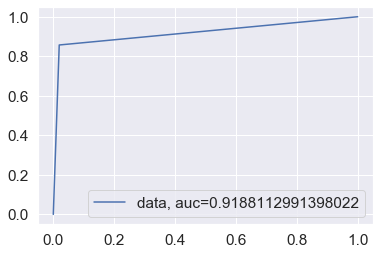

The standard accuracy score is:  0.9802675467855764
The recall score is:  0.8571428571428571
The F2 Score is:  0.5993413830954994
The ROC_AUC Score is:  0.9188112991398022
The matthew's correlation coefficient is:  0.2423178619050763


In [84]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

X_train = train_df[predictors]
y_train = train_df[target].values
X_test = test_df[predictors]
y_test = test_df[target].values


#Build the model
clf = LogisticRegression(class_weight='balanced') # We set classweight=balanced to give more weight to minority class

# Train the classifier
clf.fit(X_train, y_train)

#test the model
y_pred = clf.predict(X_test)

#classification report
# cr = (classification_report(y_test, y_pred))

#classification report
# print(classification_report(y_test, y_pred))

#heat map for confusion matrix
# fig, ax = plt.subplots(figsize=(10,7))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.show()


#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

#ROC curve evaluation
print("Roc Curve evaluation")
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("The standard accuracy score is: ", accuracy_score(test_df[target].values, y_pred))
print("The recall score is: ", sklearn.metrics.recall_score(test_df[target].values, y_pred))
print("The F2 Score is: ", fbeta_score(test_df[target].values, y_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(test_df[target].values, y_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_df[target].values, y_pred))


# Logistic Regression with SMOTE

Roc Curve evaluation


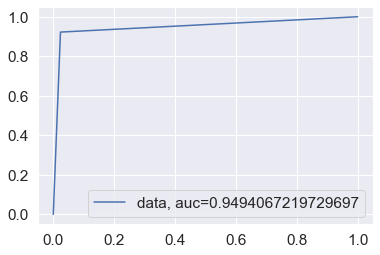

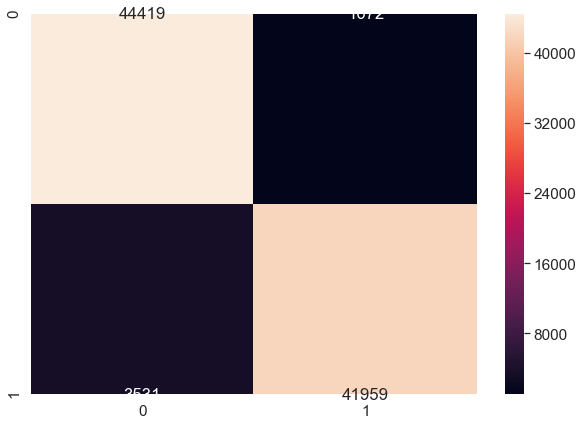

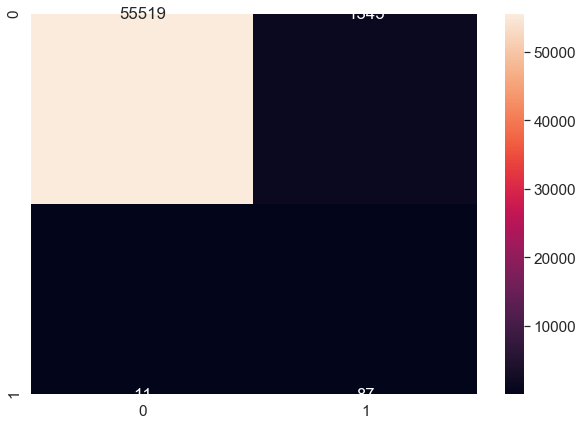

Goodness of Fit of Model 	Test Dataset
The standard accuracy score is:  0.9494070190479331
The recall score is:  0.9223785447351066
The F2 Score is:  0.9243002301994185
The ROC_AUC Score is:  0.9494067219729697
The matthew's correlation coefficient is:  0.9001300176925937
 
Goodness of Fit of Model 	Valid Dataset
The standard accuracy score is:  0.9761946560865138
The recall score is:  0.8877551020408163
The F2 Score is:  0.5826893353941268
The ROC_AUC Score is:  0.9320510878802843
The matthew's correlation coefficient is:  0.22875020600613805


In [85]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report


#Build the model
clf = LogisticRegression(class_weight='balanced') # We set classweight=balanced to give more weight to minority class

# Train the classifier
clf.fit(X_train_sampled_df, y_train_sampled_df)

#test the model
y_test_pred = clf.predict(X_test_sampled_df)
y_valid_pred = clf.predict(X_valid_sampled_df)

#classification report
# cr = (classification_report(y_test_sampled_df, y_pred))

#classification report
# print(classification_report(y_test_sampled_df, y_pred))

#heat map for confusion matrix
# fig, ax = plt.subplots(figsize=(10,7))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.show()

#print the actual and predicted labels
#df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
#print(df1.head(25))

#ROC curve evaluation
print("Roc Curve evaluation")
fpr, tpr, _ = metrics.roc_curve(y_test_sampled_df, y_test_pred)
auc = metrics.roc_auc_score(y_test_sampled_df, y_test_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_test_sampled_df, y_test_pred), annot=True, fmt='d')
plt.show()

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_valid_sampled_df, y_valid_pred), annot=True, fmt='d')
plt.show()




print("Goodness of Fit of Model \tTest Dataset")
print("The standard accuracy score is: ", accuracy_score(y_test_sampled_df, y_test_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test_sampled_df, y_test_pred))
print("The F2 Score is: ", fbeta_score(y_test_sampled_df, y_test_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test_sampled_df, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test_sampled_df, y_test_pred))

print(' ')
print("Goodness of Fit of Model \tValid Dataset")
print("The standard accuracy score is: ", accuracy_score(y_valid_sampled_df, y_valid_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_valid_sampled_df, y_valid_pred))
print("The F2 Score is: ", fbeta_score(y_valid_sampled_df, y_valid_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_valid_sampled_df, y_valid_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_valid_sampled_df, y_valid_pred))



# Logistic Regression with RUS

Roc Curve evaluation


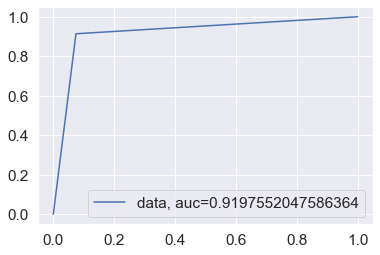

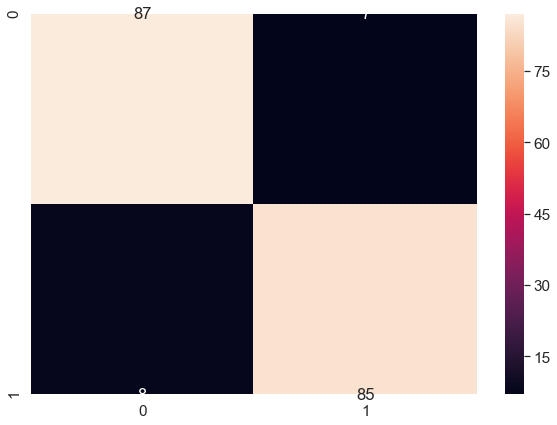

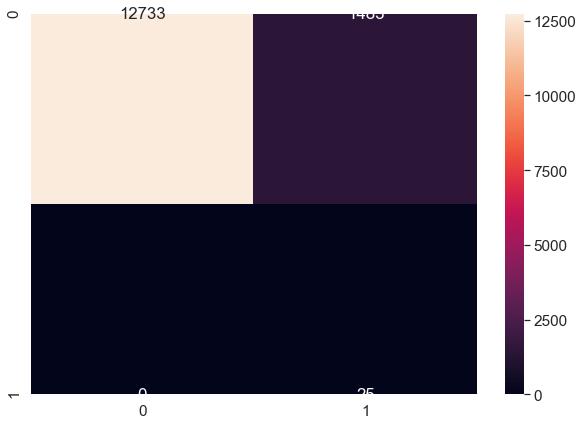

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9197860962566845
The recall score is:  0.9139784946236559
The F2 Score is:  0.9143566404633843
The ROC_AUC Score is:  0.9197552047586364
The matthew's correlation coefficient is:  0.8396064578454308

Goodness of Fit of Model 	Valid Dataset
Classification Accuracy 	: 0.8958640544905554
The recall score is:  1.0
The F2 Score is:  0.30473511486169713
The ROC_AUC Score is:  0.9478404614518853
The matthew's correlation coefficient is:  0.12185574121138718



In [86]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report


#Build the model
clf = LogisticRegression(class_weight='balanced') # We set classweight=balanced to give more weight to minority class

# Train the classifier
clf.fit(X_train_rus_df, y_train_rus_df)

#test the model
y_test_pred = dectree.predict(X_test_rus_df)
y_valid_pred = dectree.predict(X_valid_rus_df)

#classification report
# cr = (classification_report(y_test_sampled_df, y_pred))

#classification report
# print(classification_report(y_test_sampled_df, y_pred))

#heat map for confusion matrix
# fig, ax = plt.subplots(figsize=(10,7))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.show()

#print the actual and predicted labels
#df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
#print(df1.head(25))

#ROC curve evaluation
print("Roc Curve evaluation")
fpr, tpr, _ = metrics.roc_curve(y_test_rus_df, y_test_pred)
auc = metrics.roc_auc_score(y_test_rus_df, y_test_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()



#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_test_rus_df, y_test_pred), annot=True, fmt='d')
plt.show()

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(y_valid_rus_df, y_valid_pred), annot=True, fmt='d')
plt.show()




# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test_rus_df, y_test_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test_rus_df, y_test_pred))
print("The F2 Score is: ", fbeta_score(y_test_rus_df, y_test_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test_rus_df, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test_rus_df, y_test_pred))

# scoring_function(confusion_matrix(y_test_sampled_df, y_test_pred))
print()

# Check the Goodness of Fit (on Valid Data)
print("Goodness of Fit of Model \tValid Dataset")
print("Classification Accuracy \t:", accuracy_score(y_valid_rus_df, y_valid_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_valid_rus_df, y_valid_pred))
print("The F2 Score is: ", fbeta_score(y_valid_rus_df, y_valid_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_valid_rus_df, y_valid_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_valid_rus_df, y_valid_pred))

# scoring_function(confusion_matrix(y_train_sampled_df, y_train_pred))
print()



In [90]:
# As expected, there was barely any difference in results whether we oversampled the data or not.
# We could also see that the RUS Sample performed a lot worst. This is expected as well as Logistic Regression is a data
# hungry model that requires as many 'plots' as possible

# Artificial Neural Networks

An alternative to the use of preprocessing techniques in combination with a classifier is the use of deep learning. 

# Artificial Neural Networks Function Set Up

In [91]:
from keras import backend as K

def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value


    
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
#     y_pred = K.round(y_pred > 0.5)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)


def matthewCoefficient(y_true, y_pred):
    y_pred = K.round(y_pred)
#     y_pred = K.round(y_pred > 0.5)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)
    matthewcoef = ((tp*tn) - (fp*fn))/ ((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())

#     f1 = 2*p*r / (p+r+K.epsilon())
    matthewcoef = tf.where(tf.math.is_nan(matthewcoef), tf.zeros_like(matthewcoef), matthewcoef)
    return K.mean(matthewcoef)
    

# Artificial Neural Networks

Epoch 1/5
227845/227845 [==============================] - 10s 46us/step - loss: 0.0146 - matthewCoefficient: 0.0252 - f1: 0.0252
Epoch 2/5
227845/227845 [==============================] - 10s 43us/step - loss: 0.0028 - matthewCoefficient: 0.0443 - f1: 0.0443
Epoch 3/5
227845/227845 [==============================] - 8s 37us/step - loss: 0.0026 - matthewCoefficient: 0.0442 - f1: 0.0442
Epoch 4/5
227845/227845 [==============================] - 7s 31us/step - loss: 0.0025 - matthewCoefficient: 0.0445 - f1: 0.0445
Epoch 5/5
56962/56962 [==============================] - 1s 18us/step
The standard accuracy score is:  0.9992275552122467
The recall score is:  0.6938775510204082
The F2 Score is:  0.69826224328594
The ROC_AUC Score is:  0.846815674778634
The matthew's correlation coefficient is:  0.7581824619966644


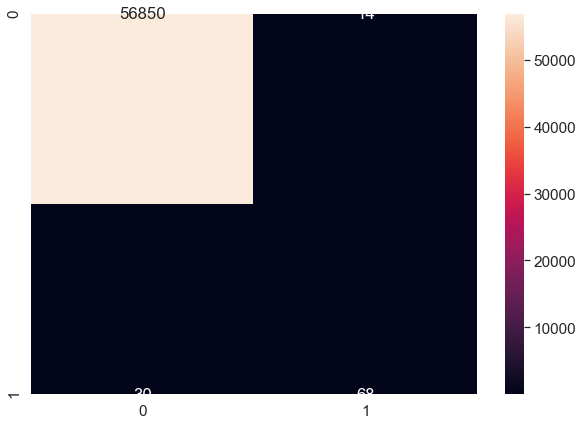

In [92]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
import tensorflow as tf


X_train = train_df[predictors]
y_train = train_df[target].values
X_test = test_df[predictors]
y_test = test_df[target].values

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [matthewCoefficient, f1])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 5)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

print("The standard accuracy score is: ", accuracy_score(y_test, y_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test, y_pred))
print("The F2 Score is: ", fbeta_score(y_test, y_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test, y_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test, y_pred))



# Artificial Neural Networks with SMOTE

Epoch 1/5
363921/363921 [==============================] - 16s 45us/step - loss: 0.0472 - f1: 0.9834 - matthewCoefficient: 0.9681
Epoch 2/5
363921/363921 [==============================] - 13s 36us/step - loss: 0.0162 - f1: 0.9951 - matthewCoefficient: 0.9905
Epoch 3/5
363921/363921 [==============================] - 11s 31us/step - loss: 0.0123 - f1: 0.9965 - matthewCoefficient: 0.9933
Epoch 4/5
363921/363921 [==============================] - 11s 31us/step - loss: 0.0103 - f1: 0.9973 - matthewCoefficient: 0.9947
Epoch 5/5
363921/363921 [==============================] - 11s 31us/step - loss: 0.0090 - f1: 0.9977 - matthewCoefficient: 0.9955
 
Goodness of Fit of Model 	Test Dataset
The standard accuracy score is:  0.9977467822952045
The recall score is:  0.9990107715981534
The F2 Score is:  0.9989136453749614
The ROC_AUC Score is:  0.9977467961879449
The matthew's correlation coefficient is:  0.9954967457232092
 
Goodness of Fit of Model 	Valid Dataset
The standard accuracy score is:  

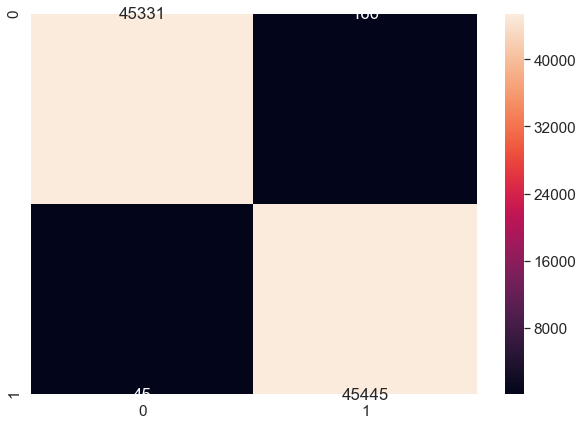

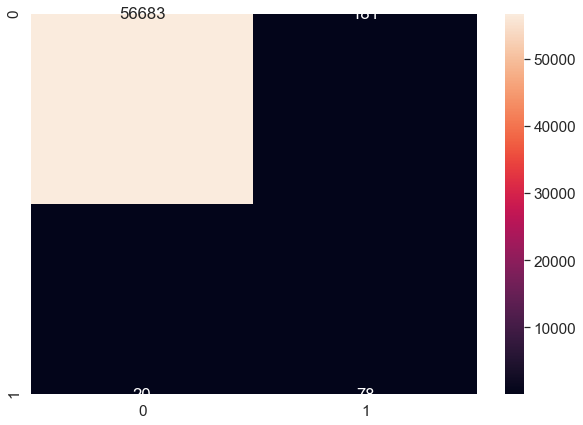

In [94]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
import tensorflow as tf



# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1])
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [f1, matthewCoefficient])

# Fitting the ANN to the Training set
classifier.fit(X_train_sampled_df, y_train_sampled_df, batch_size = 32, epochs = 5)

# Predicting the Test set results
y_test_pred = classifier.predict(X_test_sampled_df)
y_valid_pred = classifier.predict(X_valid_sampled_df)

y_test_pred = (y_test_pred > 0.5)
y_valid_pred = (y_valid_pred > 0.5)

# score = classifier.evaluate(X_test_sampled_df, y_test_sampled_df)
cm = confusion_matrix(y_test_sampled_df, y_test_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

cm = confusion_matrix(y_valid_sampled_df, y_valid_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

print(' ')
print("Goodness of Fit of Model \tTest Dataset")
print("The standard accuracy score is: ", accuracy_score(y_test_sampled_df, y_test_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test_sampled_df, y_test_pred))
print("The F2 Score is: ", fbeta_score(y_test_sampled_df, y_test_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test_sampled_df, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test_sampled_df, y_test_pred))

print(' ')
print("Goodness of Fit of Model \tValid Dataset")
print("The standard accuracy score is: ", accuracy_score(y_valid_sampled_df, y_valid_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_valid_sampled_df, y_valid_pred))
print("The F2 Score is: ", fbeta_score(y_valid_sampled_df, y_valid_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_valid_sampled_df, y_valid_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_valid_sampled_df, y_valid_pred))



# Artificial Neural Networks with RUS

Epoch 1/200
747/747 [==============================] - 0s 475us/step - loss: 0.6775 - f1: 0.7111 - matthewCoefficient: 0.2983
Epoch 2/200
747/747 [==============================] - 0s 49us/step - loss: 0.5749 - f1: 0.8277 - matthewCoefficient: 0.6424
Epoch 3/200
747/747 [==============================] - 0s 44us/step - loss: 0.4527 - f1: 0.8771 - matthewCoefficient: 0.7528
Epoch 4/200
747/747 [==============================] - 0s 53us/step - loss: 0.3947 - f1: 0.9204 - matthewCoefficient: 0.8435
Epoch 5/200
747/747 [==============================] - 0s 51us/step - loss: 0.3534 - f1: 0.9283 - matthewCoefficient: 0.8681
Epoch 6/200
747/747 [==============================] - 0s 57us/step - loss: 0.3092 - f1: 0.9325 - matthewCoefficient: 0.8753
Epoch 7/200
747/747 [==============================] - 0s 56us/step - loss: 0.2634 - f1: 0.9313 - matthewCoefficient: 0.8766
Epoch 8/200
747/747 [==============================] - 0s 53us/step - loss: 0.2210 - f1: 0.9357 - matthewCoefficient: 0.8808

747/747 [==============================] - 0s 51us/step - loss: 0.0087 - f1: 1.0000 - matthewCoefficient: 1.0000
Epoch 130/200
747/747 [==============================] - 0s 41us/step - loss: 0.0087 - f1: 1.0000 - matthewCoefficient: 1.0000
Epoch 131/200
747/747 [==============================] - 0s 45us/step - loss: 0.0085 - f1: 1.0000 - matthewCoefficient: 1.0000
Epoch 132/200
747/747 [==============================] - 0s 45us/step - loss: 0.0082 - f1: 1.0000 - matthewCoefficient: 1.0000
Epoch 133/200
747/747 [==============================] - 0s 43us/step - loss: 0.0079 - f1: 1.0000 - matthewCoefficient: 1.0000
Epoch 134/200
747/747 [==============================] - 0s 40us/step - loss: 0.0076 - f1: 1.0000 - matthewCoefficient: 1.0000
Epoch 135/200
747/747 [==============================] - 0s 43us/step - loss: 0.0076 - f1: 1.0000 - matthewCoefficient: 1.0000
Epoch 136/200
747/747 [==============================] - 0s 53us/step - loss: 0.0076 - f1: 1.0000 - matthewCoefficient: 1.000

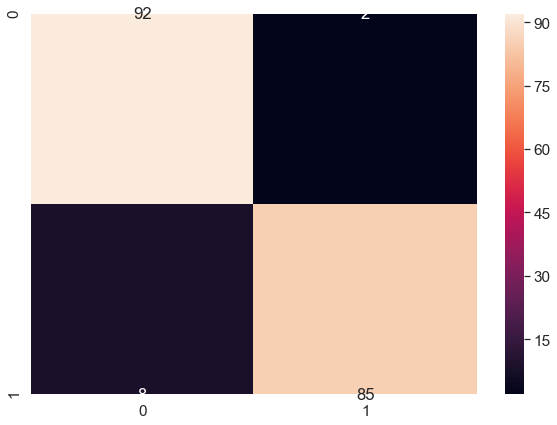

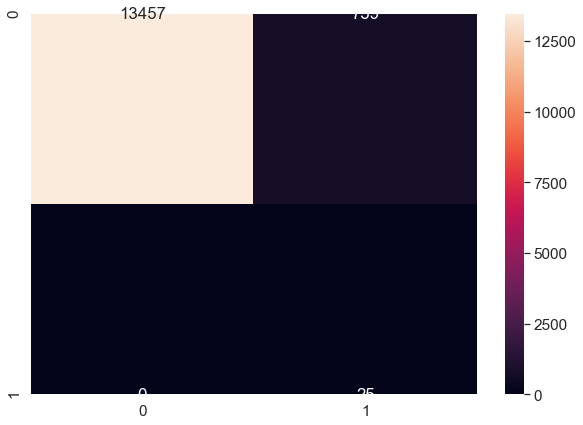

In [95]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
import tensorflow as tf


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', f1])
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [f1, matthewCoefficient])

# Fitting the ANN to the Training set
classifier.fit(X_train_rus_df, y_train_rus_df, batch_size = 32, epochs = 200)

# Predicting the Test set results
y_test_pred = classifier.predict(X_test_rus_df)
y_valid_pred = classifier.predict(X_valid_rus_df)

y_test_pred = (y_test_pred > 0.5)
y_valid_pred = (y_valid_pred > 0.5)

# score = classifier.evaluate(X_test_sampled_df, y_test_sampled_df)
cm = confusion_matrix(y_test_rus_df, y_test_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

cm = confusion_matrix(y_valid_rus_df, y_valid_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test_rus_df, y_test_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_test_rus_df, y_test_pred))
print("The F2 Score is: ", fbeta_score(y_test_rus_df, y_test_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_test_rus_df, y_test_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_test_rus_df, y_test_pred))

# scoring_function(confusion_matrix(y_test_sampled_df, y_test_pred))
print()

# Check the Goodness of Fit (on Valid Data)
print("Goodness of Fit of Model \tValid Dataset")
print("Classification Accuracy \t:", accuracy_score(y_valid_rus_df, y_valid_pred))
print("The recall score is: ", sklearn.metrics.recall_score(y_valid_rus_df, y_valid_pred))
print("The F2 Score is: ", fbeta_score(y_valid_rus_df, y_valid_pred,5))
print("The ROC_AUC Score is: ", roc_auc_score(y_valid_rus_df, y_valid_pred))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(y_valid_rus_df, y_valid_pred))

# scoring_function(confusion_matrix(y_train_sampled_df, y_train_pred))
print()



# Analysis of Results


| Sampling Technique | Metrics | Decision Tree | Random Forest | Logistic Regression | ANN |
| --- | --- | --- | --- | --- | --- |
| Control | F2 | 0.70411 | 0.72082 | 0.59935 | 0.69824 |
| Control | ROC-AUC | 0.88987 | 0.88497 | 0.94900 | 0.84682 |
| Control | MCC | 0.80850 | 0.86068 | 0.24776 | 0.75818 |
| SMOTE | F2 | 0.70423 | *0.80687* | 0.58273 | 0.74867 |
| SMOTE | ROC-AUC | 0.99810 | 0.94433 | 0.94433 | 0.89636 |
| SMOTE | MCC | 0.89052 | 0.89052 | 0.89052 | 0.48832 |
| RUS | F2 | 0.30478 | 0.30478 | 0.30478 | 0.46138 |
| RUS | ROC-AUC | 0.93501 | 0.93501 | 0.92688 | 0.97330 |
| RUS | MCC | 0.12184 | 0.12812 | 0.14444 | 0.17374 |


From the results, we can see that (insert sampling method here) works best with (insert classifier here) at (value). Overall, SMOTE works best because ... . Resampling did not improve upon logistic regression (why).   

During this research, the primary goal was to review various sampling techniques that could improve the classification performance in the case of imbalanced data. In conclusion, (Insert method) was the best.
However, in real-world applications, the performance still depends on the imbalance of the data, scaling and reduction method, and the used classifier. In practice, several methods should be evaluated to achieve the best performance.